# REGRESSION AND CLASSIFICATION

This notebook will attempt to predict if a song is popular by means of linear regression model and decision tree classification model. So, first let us start of with the regression model.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [2]:
# Reading Dataset
spotdata = pd.read_csv('spotifyfeatures.csv',header = 0)

# REGRESSION

## Importing essential functions for the regression model

In [3]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### From the EDA, there doesn't seem to very high correlation of popularity with the other features. However, in order to test it out, we observed that acousticness and popularity seemed to have a negative correlation of -0.38, which is not very high, but is the highest among the other features.

In [4]:
# Recall the popularity- acousticness Dataset
popular = pd.DataFrame(spotdata['popularity'])   # Response
acous = pd.DataFrame(spotdata['acousticness'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(acous, popular, test_size = 0.25)


In [5]:
# Linear Regression using Train Data
linreg1 = LinearRegression()         # create the linear regression object
linreg1.fit(X_train, y_train)        # train the linear regression model

LinearRegression()

In [6]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg1.intercept_)
print('Coefficients of Regression \t: a = ', linreg1.coef_)
print()

Intercept of Regression 	: b =  [48.38303539]
Coefficients of Regression 	: a =  [[-19.62477782]]



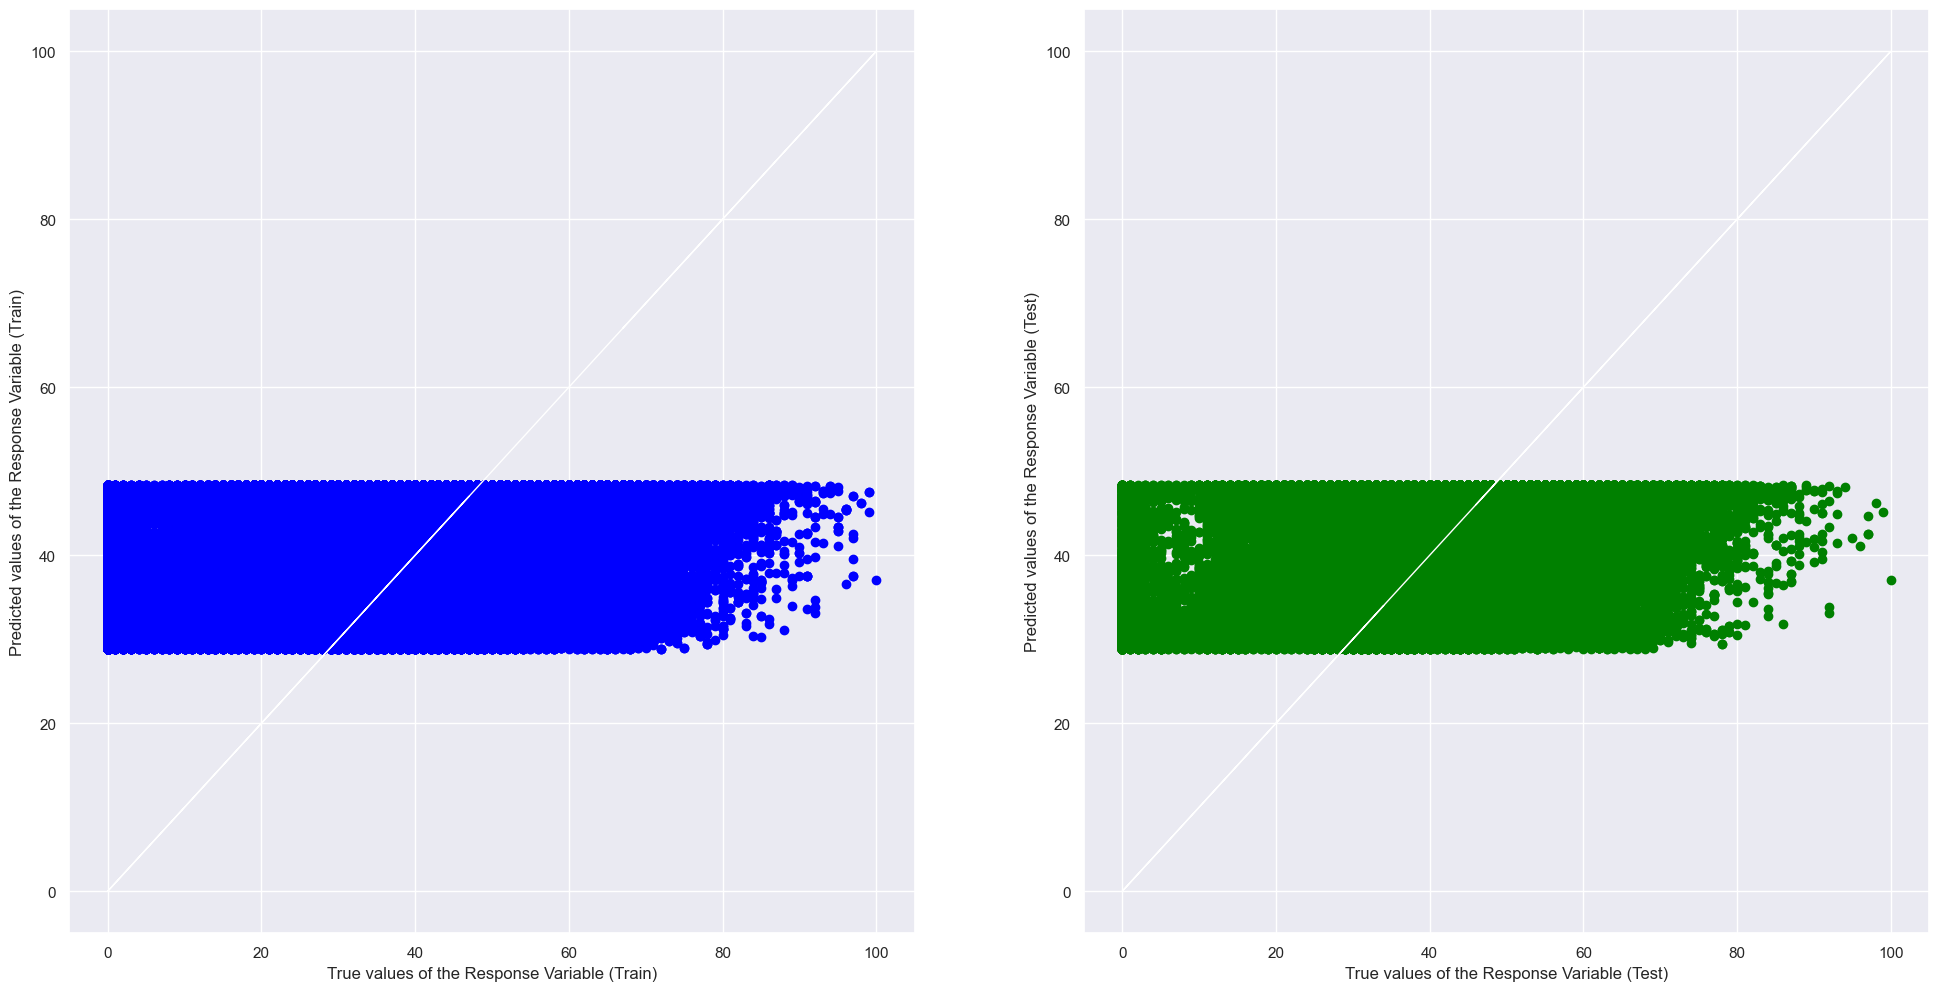

In [7]:
# Predict Popularity values corresponding to acousticness
y_train_pred = linreg1.predict(X_train)
y_test_pred = linreg1.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [8]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.14629805816355046
Mean Squared Error (MSE) 	: 282.9940197495567

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.14260617793287433
Mean Squared Error (MSE) 	: 282.09666627023734



### As, predicted from our EDA and assumptions, it doesn't seem like we can predict popularity based on "acousticness". The explained variance value is very low for both train and test sets. 

### Another potential predictor might be loudness with a positive corelation of 0.36, which still s not very high but we shall perform linear regression on them.

In [9]:
# Recall the popularity- acousticness Dataset
popular = pd.DataFrame(spotdata['popularity'])   # Response
loud = pd.DataFrame(spotdata['loudness'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(loud, popular, test_size = 0.25)


# Linear Regression using Train Data
linreg2 = LinearRegression()         # create the linear regression object
linreg2.fit(X_train, y_train)        # train the linear regression model

LinearRegression()

In [10]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg2.intercept_)
print('Coefficients of Regression \t: a = ', linreg2.coef_)
print()

Intercept of Regression 	: b =  [51.64200791]
Coefficients of Regression 	: a =  [[1.09760307]]



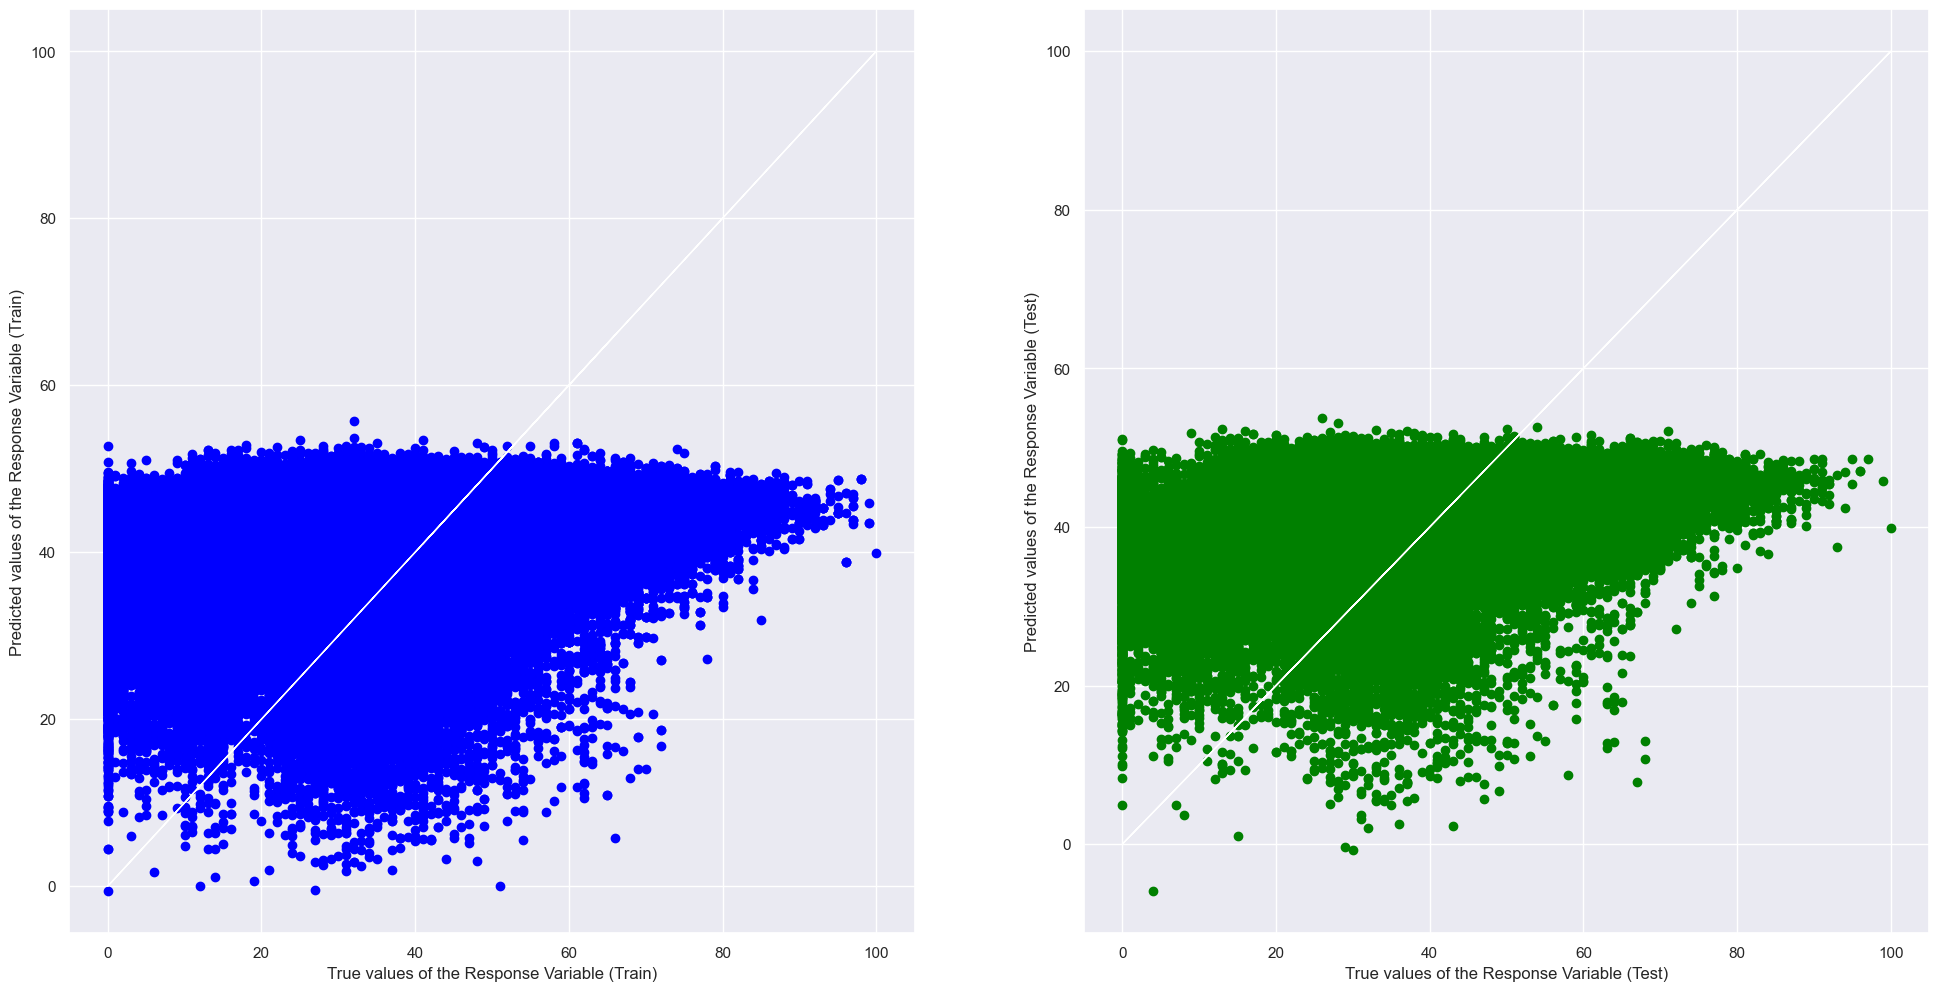

In [11]:
# Predict Popularity values corresponding to acousticness
y_train_pred = linreg2.predict(X_train)
y_test_pred = linreg2.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [12]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.13157219273471532
Mean Squared Error (MSE) 	: 286.729132895394

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.13237198326294808
Mean Squared Error (MSE) 	: 288.90021251471904



### Again, it seems that loudness is NOT a good predictor for popularity in terms of linear regression either.

### Instead of uni-variate linear regression, it might give better results to try multi-variate regression to predict the popularity.

In [13]:
# Extract Response and Predictors
y = pd.DataFrame(spotdata["popularity"])
X = pd.DataFrame(spotdata[["acousticness", "loudness", "energy", "danceability"]])

In [14]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (174543, 1) (174543, 4)
Test Set  : (58182, 1) (58182, 4)


<Axes: >

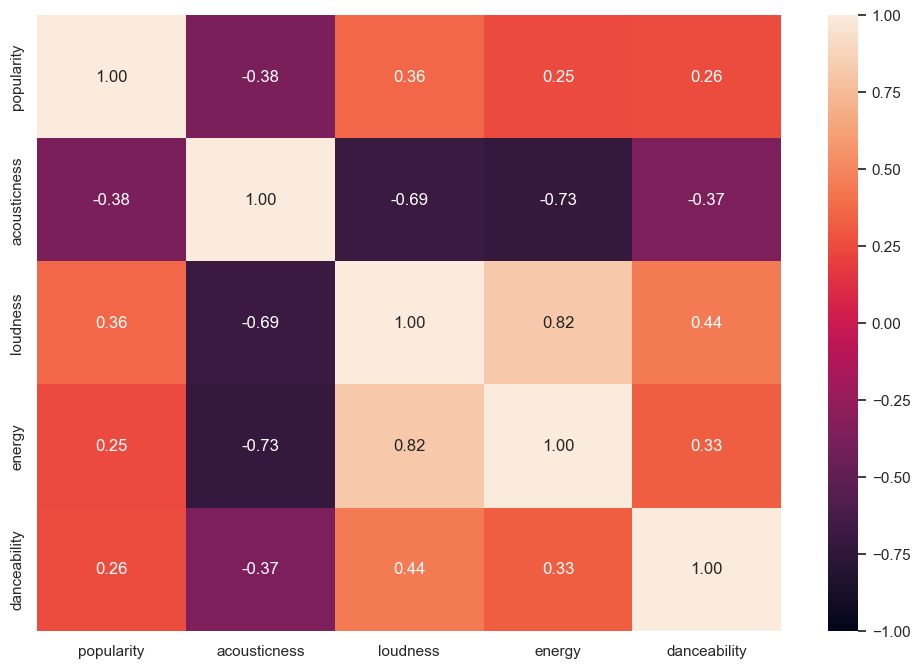

In [15]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [16]:
# Linear Regression using Train Data
linreg3 = LinearRegression()         # create the linear regression object
linreg3.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg3.intercept_)
print('Coefficients of Regression \t: a = ', linreg3.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg3.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [64.17408457]
Coefficients of Regression 	: a =  [[-16.89240516   1.02506097 -20.17862831   8.13277739]]



,Predictors,Coefficients
0,acousticness,-16.892405
1,loudness,1.025061
2,energy,-20.178628
3,danceability,8.132777


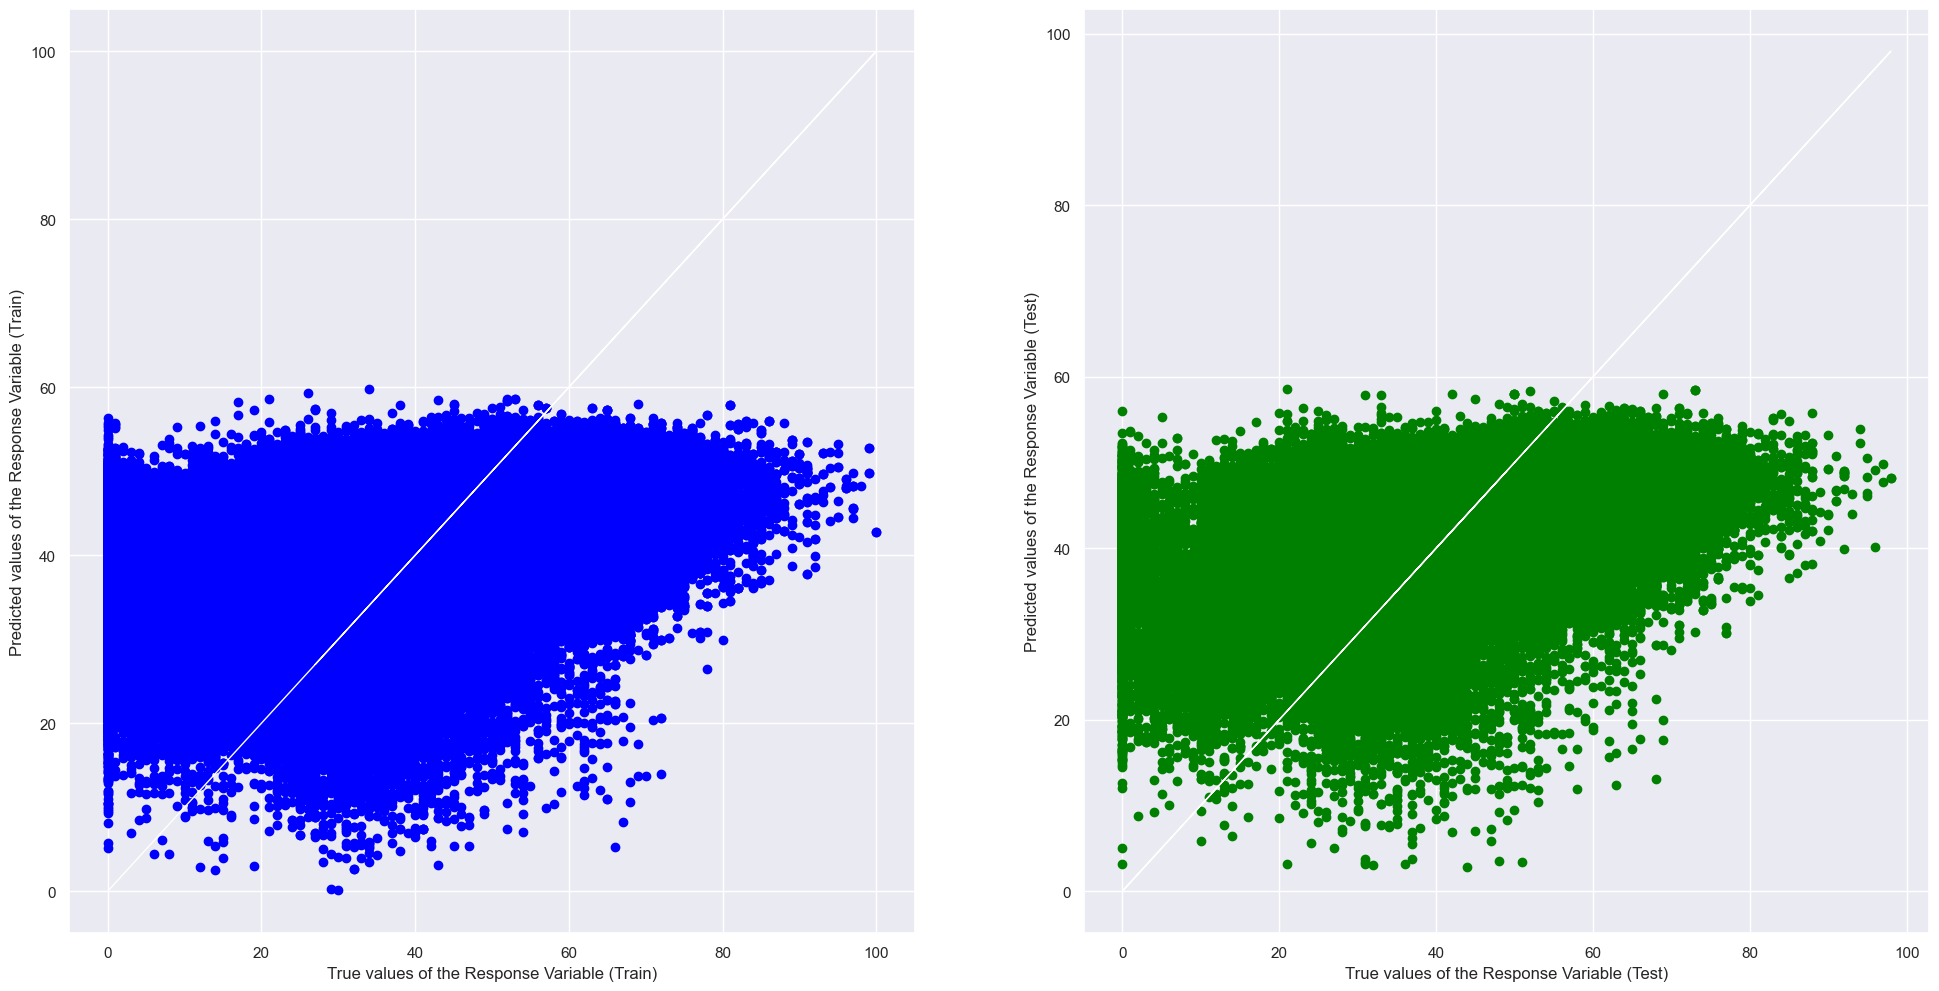

In [17]:
# Predict the Total values from Predictors
y_train_pred = linreg3.predict(X_train)
y_test_pred = linreg3.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [18]:

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg3.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg3.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1967612706330676
Mean Squared Error (MSE) 	: 265.3359387947321

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1982485569299549
Mean Squared Error (MSE) 	: 266.5766781776843



### Performing the multivariate regression to predict popularity seems to have given better outcomes as compared to just uni-variate. The explained variance of train and test seem to be higher for the multivariate regression as compared to the previous two we did. While the goodness of fit has improved, it still is not acceptably high enough.

#

## CLASSIFICATION

### In order to classify popularity, we have to first make a popularity a categorical variable. 

In [19]:
popDF = pd.DataFrame(spotdata["popularity"])
popDF.describe()

,popularity
count,232725.000000
mean,41.127502
std,18.189948
min,0.000000
25%,29.000000
50%,43.000000
75%,55.000000
max,100.000000


### From the description for popularity variable in the dataset, we can take the 3rd quartile value (55.00) as a separation for "popular" or "not popular". So, accordingly, following the steps we did in our EDA notebook:

In [20]:
# DataFrame with the 12 Features + "popularity"
featStreamDF = pd.DataFrame(spotdata[["duration_ms","popularity", "danceability", "energy", "loudness", "speechiness", "acousticness",	"instrumentalness",	"liveness",	"valence", "tempo"]])

#Splitting data set to above and below 55
featStreamDF.loc[featStreamDF['popularity'] < 55, 'popularity'] = 0 
featStreamDF.loc[featStreamDF['popularity'] >= 55, 'popularity'] = 1
featStreamDF.loc[featStreamDF['popularity'] == 1]

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
135,246333,1,0.724,0.689,-5.922,0.1350,0.0830,0.000000,0.3040,0.6930,146.496
136,186467,1,0.685,0.610,-5.221,0.0439,0.3230,0.000000,0.1020,0.3230,94.384
137,199520,1,0.762,0.520,-5.237,0.0959,0.0675,0.000004,0.1140,0.0862,75.047
138,240597,1,0.563,0.366,-6.896,0.1210,0.3600,0.002430,0.0955,0.7680,85.352
139,213947,1,0.653,0.621,-5.721,0.0409,0.5960,0.000000,0.0811,0.4660,100.006
...,...,...,...,...,...,...,...,...,...,...,...
231317,131160,1,0.518,0.694,-5.631,0.0836,0.5840,0.000000,0.6870,0.8730,160.537
231493,262827,1,0.660,0.560,-8.894,0.0287,0.2100,0.000040,0.0974,0.6410,89.505
231638,158493,1,0.661,0.909,-2.323,0.0494,0.0981,0.000000,0.3050,0.6430,125.021
232230,274747,1,0.677,0.845,-8.270,0.0379,0.0253,0.001020,0.3250,0.6390,105.893


### Now, "popularity" is a binary variable --> 1 indicating popular and 0 indicating "not popular"

In [21]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [22]:
# Extract Response and Predictors
pop = pd.DataFrame(featStreamDF["popularity"])
loud = pd.DataFrame(featStreamDF["loudness"])

In [23]:
# Split the  Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(loud, pop, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (174543, 1) (174543, 1)
Test Set  : (58182, 1) (58182, 1)


### Exploring the train data:-

In [24]:
# Summary Statistics for Response
y_train["popularity"].value_counts()

0    130738
1     43805
Name: popularity, dtype: int64

In [25]:
# Summary Statistics for Predictor Train
X_train.describe()

,loudness
count,174543.000000
mean,-9.569248
std,5.991669
min,-47.599000
25%,-11.775500
50%,-7.762000
75%,-5.500000
max,1.949000


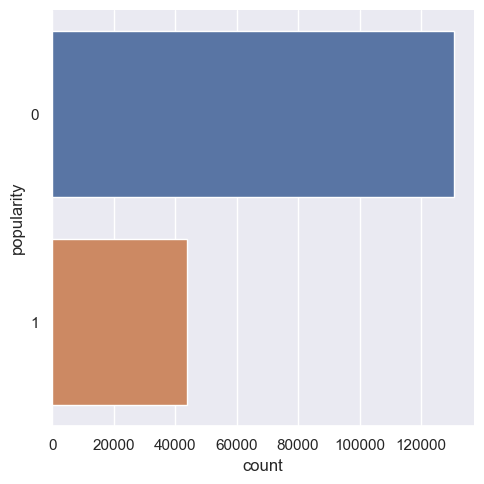

In [26]:
# Count Plot for Legendary Train
sb.catplot(y = "popularity", data = y_train, kind = "count")

<Axes: >

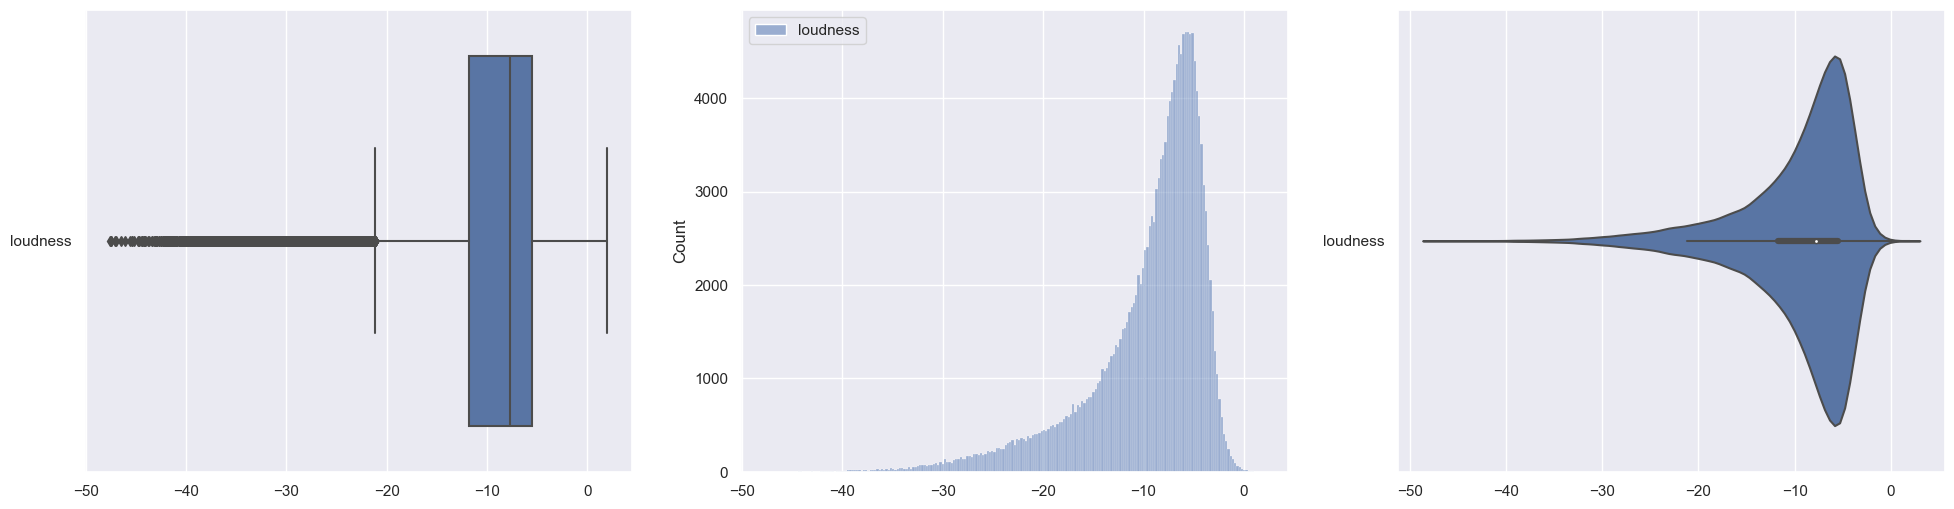

In [27]:
# Plot the distributions of loudness Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = X_train, orient = "h", ax = axes[0])
sb.histplot(data = X_train, ax = axes[1])
sb.violinplot(data = X_train, orient = "h", ax = axes[2])

<Axes: xlabel='loudness', ylabel='popularity'>

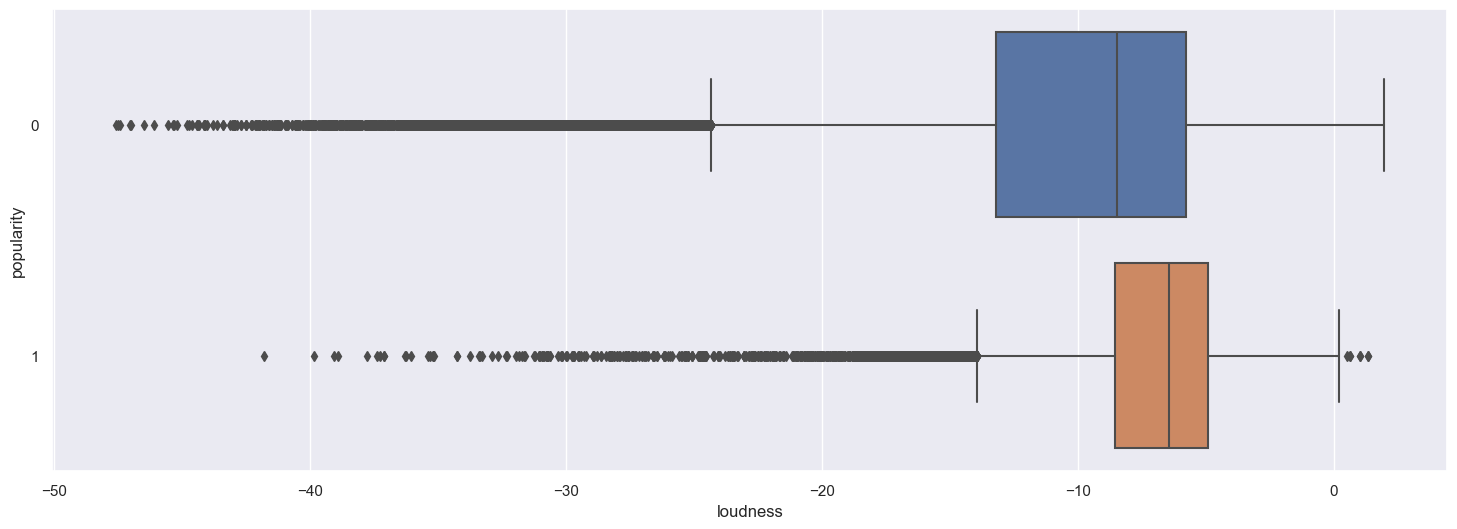

In [28]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

# Joint Boxplot of loudness Train against popularity Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "loudness", y = "popularity", data = trainDF, orient = "h")

### Fitting the decision tree model on the train data

In [29]:
# Decision Tree using Train Data
dectree1 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree1.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=4)

In [30]:
# Predict popularity values corresponding to loudness
y_train_pred_1 = dectree1.predict(X_train)
y_test_pred_1 = dectree1.predict(X_test)

<Axes: >

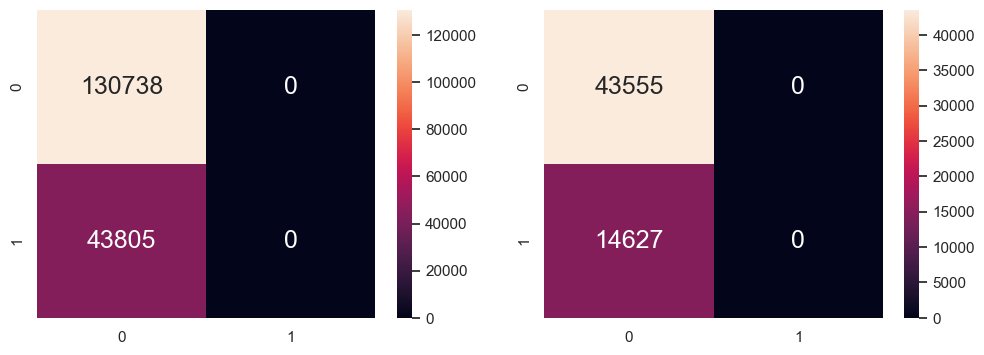

In [31]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred_1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5, 0.9, 'loudness <= -10.987\ngini = 0.376\nsamples = 174543\nvalue = [130738, 43805]\nclass = Not popular'),
 Text(0.25, 0.7, 'loudness <= -13.701\ngini = 0.169\nsamples = 49591\nvalue = [44983, 4608]\nclass = Not popular'),
 Text(0.125, 0.5, 'loudness <= -17.288\ngini = 0.099\nsamples = 32205\nvalue = [30521, 1684]\nclass = Not popular'),
 Text(0.0625, 0.3, 'loudness <= -18.995\ngini = 0.056\nsamples = 19027\nvalue = [18475, 552]\nclass = Not popular'),
 Text(0.03125, 0.1, 'gini = 0.047\nsamples = 14901\nvalue = [14542, 359]\nclass = Not popular'),
 Text(0.09375, 0.1, 'gini = 0.089\nsamples = 4126\nvalue = [3933, 193]\nclass = Not popular'),
 Text(0.1875, 0.3, 'loudness <= -15.676\ngini = 0.157\nsamples = 13178\nvalue = [12046, 1132]\nclass = Not popular'),
 Text(0.15625, 0.1, 'gini = 0.125\nsamples = 5070\nvalue = [4729, 341]\nclass = Not popular'),
 Text(0.21875, 0.1, 'gini = 0.176\nsamples = 8108\nvalue = [7317, 791]\nclass = Not popular'),
 Text(0.375, 0.5, 'loudness <= -

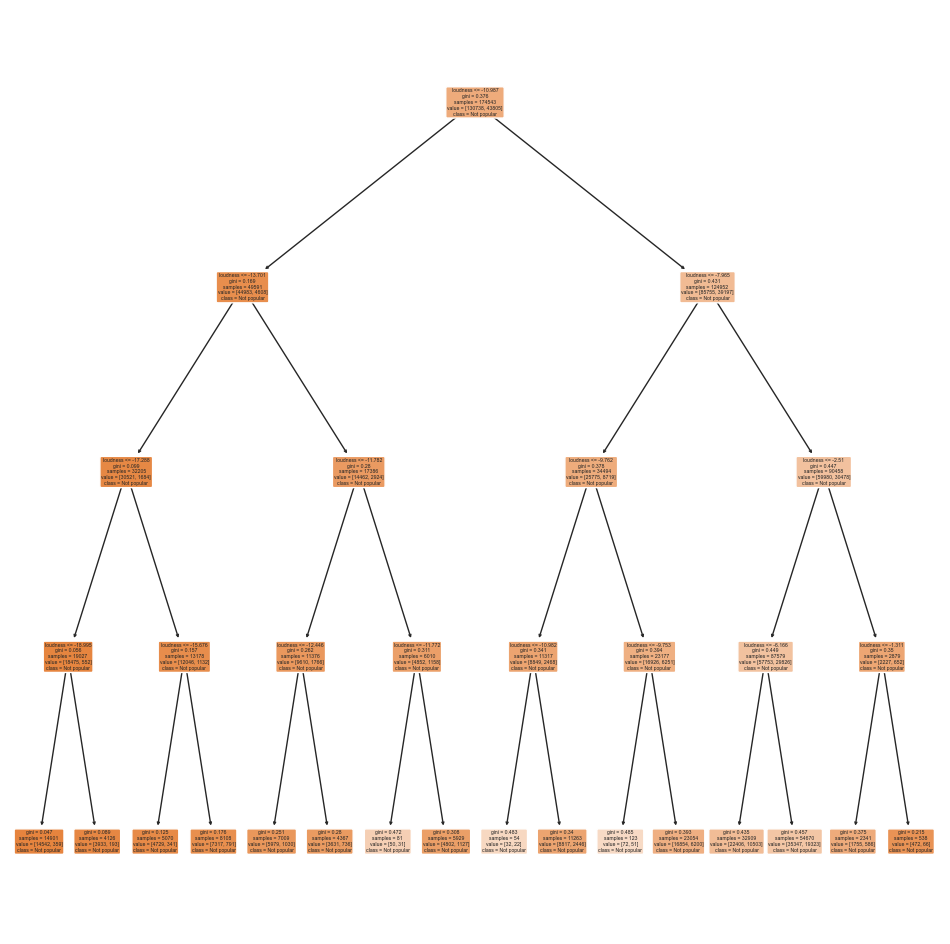

In [32]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["loudness"], 
          class_names=["Not popular","Popular"])

In [33]:
train1_tn = confusion_matrix(y_train, y_train_pred_1) [0,0] #true negative
train1_fp = confusion_matrix(y_train, y_train_pred_1) [0,1] #false positive
train1_fn = confusion_matrix(y_train, y_train_pred_1) [1,0] #false negative
train1_tp = confusion_matrix(y_train, y_train_pred_1) [1,1] #true postive

train1_tpr = train1_tp / (train1_tp + train1_fn) #true positive rate
train1_fpr = train1_fp / (train1_fp + train1_tn) #false positive rate
train1_fnr = train1_fn / (train1_fn + train1_tp) #false negative rate

test1_tn = confusion_matrix(y_test, y_test_pred_1) [0,0] #true negative
test1_fp = confusion_matrix(y_test, y_test_pred_1) [0,1] #false positive
test1_fn = confusion_matrix(y_test, y_test_pred_1) [1,0] #false negative
test1_tp = confusion_matrix(y_test, y_test_pred_1) [1,1] #true postive

test1_tpr = test1_tp / (test1_tp + test1_fn) #true positive rate
test1_fpr = test1_fp / (test1_fp + test1_tn) #false positive rate
test1_fnr = test1_fn / (test1_fn + test1_tp) #false negative rate

train1_precision = train1_tp / (train1_tp + train1_fp)
train1_recall = train1_tpr = train1_tp / (train1_tp + train1_fn)
train1_F1 = 2 * (train1_precision * train1_recall) / (train1_precision + train1_recall)

test1_precision = test1_tp / (test1_tp + test1_fp)
test1_recall = test1_tpr = test1_tp / (test1_tp + test1_fn)
test1_F1 = 2 * (test1_precision * test1_recall) / (test1_precision + test1_recall)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset ")
print("Classification Accuracy \t:", dectree1.score(X_train, y_train))
print("True Positive rate \t        :", train1_tpr)
print("False Positive rate \t        :", train1_fpr)
print("False Negative rate \t        :", train1_fnr)
print ("F1 Score \t                :",train1_F1)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset ")
print("Classification Accuracy \t:", dectree1.score(X_test, y_test))
print("True Positive rate \t        :", test1_tpr)
print("False Positive rate \t        :", test1_fpr)
print("False Negative rate \t        :", test1_fnr)
print ("F1 Score \t                :",test1_F1)
print()


Goodness of Fit of Model 	Train Dataset 
Classification Accuracy 	: 0.7490303249056106
True Positive rate 	        : 0.0
False Positive rate 	        : 0.0
False Negative rate 	        : 1.0
F1 Score 	                : nan

Goodness of Fit of Model 	Test Dataset 
Classification Accuracy 	: 0.7485992231274278
True Positive rate 	        : 0.0
False Positive rate 	        : 0.0
False Negative rate 	        : 1.0
F1 Score 	                : nan



/var/folders/6f/4hq9jvq51q1bz48qd2ds7y600000gn/T/ipykernel_34677/2437194286.py:19: RuntimeWarning: invalid value encountered in scalar divide
  train1_precision = train1_tp / (train1_tp + train1_fp)
/var/folders/6f/4hq9jvq51q1bz48qd2ds7y600000gn/T/ipykernel_34677/2437194286.py:23: RuntimeWarning: invalid value encountered in scalar divide
  test1_precision = test1_tp / (test1_tp + test1_fp)


### From fitting the decision tree on the dataset, we see that the true positive is low for both train and test data. This is not something that we want to see as, our aim to predict popularity but here, TP values which are our popular songs have been missclassified. Hence, we must try to fix this.

### We, hence, decided to try to fit the AdaBoostClassifier along with our DecisionTreeClassifier as it weighs the incorrectly classified instances more heavily so that the subsequent weak learners focus more on the difficult cases.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

base_estimator=DecisionTreeClassifier(max_depth=5,criterion='gini', splitter='best', min_samples_split=2)
model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=100)
model.fit(X_train, y_train)

/Users/fati/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fati/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [35]:
# Predict popularity values corresponding to loudness
y_train_pred_2 = model.predict(X_train)
y_test_pred_2 = model.predict(X_test)

<Axes: >

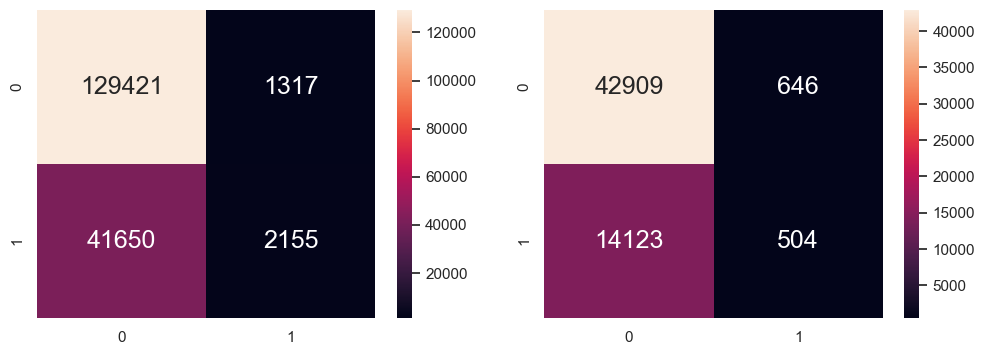

In [36]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred_2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [37]:
train2_tn = confusion_matrix(y_train, y_train_pred_2) [0,0] #true negative
train2_fp = confusion_matrix(y_train, y_train_pred_2) [0,1] #false positive
train2_fn = confusion_matrix(y_train, y_train_pred_2) [1,0] #false negative
train2_tp = confusion_matrix(y_train, y_train_pred_2) [1,1] #true postive

train2_tpr = train2_tp / (train2_tp + train2_fn) #true positive rate
train2_fpr = train2_fp / (train2_fp + train2_tn) #false positive rate
train2_fnr = train2_fn / (train2_fn + train2_tp) #false negative rate

test2_tn = confusion_matrix(y_test, y_test_pred_2) [0,0] #true negative
test2_fp = confusion_matrix(y_test, y_test_pred_2) [0,1] #false positive
test2_fn = confusion_matrix(y_test, y_test_pred_2) [1,0] #false negative
test2_tp = confusion_matrix(y_test, y_test_pred_2) [1,1] #true postive

test2_tpr = test2_tp / (test2_tp + test2_fn) #true positive rate
test2_fpr = test2_fp / (test2_fp + test2_tn) #false positive rate
test2_fnr = test2_fn / (test2_fn + test2_tp) #false negative rate

train2_precision = train2_tp / (train2_tp + train2_fp)
train2_recall = train2_tpr = train2_tp / (train2_tp + train2_fn)
train2_F1 = 2 * (train2_precision * train2_recall) / (train2_precision + train2_recall)

test2_precision = test2_tp / (test2_tp + test2_fp)
test2_recall = test2_tpr = test2_tp / (test2_tp + test2_fn)
test2_F1 = 2 * (test2_precision * test2_recall) / (test2_precision + test2_recall)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset ")
print("Classification Accuracy \t:", model.score(X_train, y_train))
print("True Positive rate \t        :", train2_tpr)
print("False Positive rate \t        :", train2_fpr)
print("False Negative rate \t        :", train2_fnr)
print ("F1 Score \t                :",train2_F1)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset ")
print("Classification Accuracy \t:", model.score(X_test, y_test))
print("True Positive rate \t        :", test2_tpr)
print("False Positive rate \t        :", test2_fpr)
print("False Negative rate \t        :", test2_fnr)
print ("F1 Score \t                :",test2_F1)
print()


Goodness of Fit of Model 	Train Dataset 
Classification Accuracy 	: 0.7538314340878752
True Positive rate 	        : 0.04919529734048625
False Positive rate 	        : 0.010073582279061941
False Negative rate 	        : 0.9508047026595138
F1 Score 	                : 0.09116483702434588

Goodness of Fit of Model 	Test Dataset 
Classification Accuracy 	: 0.746158605754357
True Positive rate 	        : 0.03445682641690025
False Positive rate 	        : 0.014831821834462175
False Negative rate 	        : 0.9655431735830997
F1 Score 	                : 0.0638904734740445



### As, we can see here, the AdaBoost Classifier seemed to have helped out with the earlier missplaced true positives. However, with the true positive rate, the False Positives have also seemed to increase.

### Attempting this again with other features as well:

In [38]:
# Extract Response and Predictors
y = pd.DataFrame(featStreamDF["popularity"])
X = pd.DataFrame(featStreamDF[["loudness", "energy", "acousticness", "danceability"]])

In [39]:

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (174543, 1) (174543, 4)
Test Set  : (58182, 1) (58182, 4)


In [40]:
base_estimator = DecisionTreeClassifier(max_depth=5,criterion='gini', splitter='best', min_samples_split=2)
model2 = AdaBoostClassifier(base_estimator = base_estimator,n_estimators=100)
model2.fit(X_train, y_train)

/Users/fati/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/fati/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [41]:
# Predict popularity values corresponding to loudness
y_train_pred_3 = model2.predict(X_train)
y_test_pred_3 = model2.predict(X_test)

<Axes: >

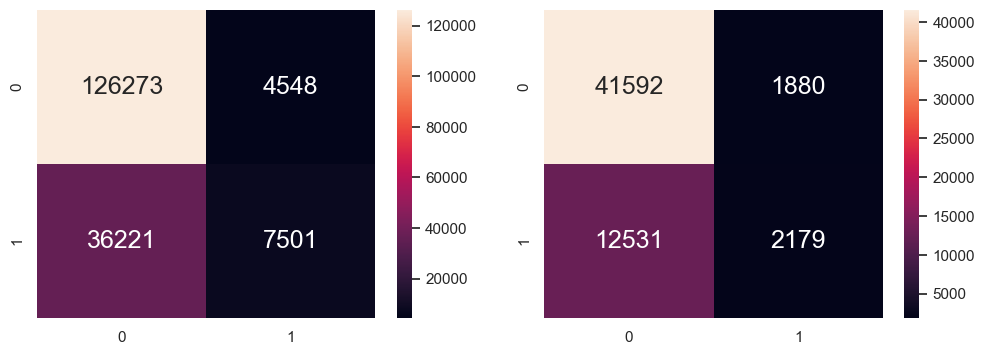

In [42]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred_3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [43]:
train3_tn = confusion_matrix(y_train, y_train_pred_3) [0,0] #true negative
train3_fp = confusion_matrix(y_train, y_train_pred_3) [0,1] #false positive
train3_fn = confusion_matrix(y_train, y_train_pred_3) [1,0] #false negative
train3_tp = confusion_matrix(y_train, y_train_pred_3) [1,1] #true postive

train3_tpr = train3_tp / (train3_tp + train3_fn) #true positive rate
train3_fpr = train3_fp / (train3_fp + train3_tn) #false positive rate
train3_fnr = train3_fn / (train3_fn + train3_tp) #false negative rate

test3_tn = confusion_matrix(y_test, y_test_pred_3) [0,0] #true negative
test3_fp = confusion_matrix(y_test, y_test_pred_3) [0,1] #false positive
test3_fn = confusion_matrix(y_test, y_test_pred_3) [1,0] #false negative
test3_tp = confusion_matrix(y_test, y_test_pred_3) [1,1] #true postive

test3_tpr = test3_tp / (test3_tp + test3_fn) #true positive rate
test3_fpr = test3_fp / (test3_fp + test3_tn) #false positive rate
test3_fnr = test3_fn / (test3_fn + test3_tp) #false negative rate

train3_precision = train3_tp / (train3_tp + train3_fp)
train3_recall = train3_tpr = train3_tp / (train3_tp + train3_fn)
train3_F1 = 2 * (train3_precision * train3_recall) / (train3_precision + train3_recall)

test3_precision = test3_tp / (test3_tp + test3_fp)
test3_recall = test3_tpr = test3_tp / (test3_tp + test3_fn)
test3_F1 = 2 * (test3_precision * test3_recall) / (test3_precision + test3_recall)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset ")
print("Classification Accuracy \t:", model2.score(X_train, y_train))
print("True Positive rate \t        :", train3_tpr)
print("False Positive rate \t        :", train3_fpr)
print("False Negative rate \t        :", train3_fnr)
print ("F1 Score \t                :",train3_F1)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset ")
print("Classification Accuracy \t:", model2.score(X_test, y_test))
print("True Positive rate \t        :", test3_tpr)
print("False Positive rate \t        :", test3_fpr)
print("False Negative rate \t        :", test3_fnr)
print ("F1 Score \t                :",test3_F1)
print()


Goodness of Fit of Model 	Train Dataset 
Classification Accuracy 	: 0.7664243195086597
True Positive rate 	        : 0.17156122775719318
False Positive rate 	        : 0.03476506065539936
False Negative rate 	        : 0.8284387722428068
F1 Score 	                : 0.268992845744204

Goodness of Fit of Model 	Test Dataset 
Classification Accuracy 	: 0.7523117115259015
True Positive rate 	        : 0.14813052345343303
False Positive rate 	        : 0.04324622745675377
False Negative rate 	        : 0.851869476546567
F1 Score 	                : 0.23219137940220577



### Comparing this multi-variate tree model with the earlier model, we see that true positive rate seems to be much higher than before and the classification accuracy also seems to have increased. 

### We can hence infer from this that the variables like loudness, energy, acousticness and danceability all contribute towards prediciting the popularity of a song.